<center><h1>Ma_Htet_HW4</h1></center>
<br>
<br>

Name: Htet Ma
<br>
Github Username: hswma
<br>
USC ID: 4522446617

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

os.chdir('../data/AReM')

Get the AReM Data Set

In [2]:
bend1_files = glob.glob('bending1/*.csv')
df_bend1 = []
for i in bend1_files:
#     print(i)
    df = pd.read_csv(i, skiprows=4, engine ='python')
    df_bend1.append(df)

bend2_files = glob.glob('bending2/*.csv')
df_bend2 = []
for i in bend2_files:
#     print(i)
    df = pd.read_csv(i, skiprows=4, engine ='python')
    df_bend2.append(df)

cycle_files = glob.glob('cycling/*.csv')
df_cycle = []
for i in cycle_files:
#     print(i)
    df = pd.read_csv(i, skiprows=4, engine ='python')
    df_cycle.append(df)
    
lie_files = glob.glob('lying/*.csv')
df_lie = []
for i in lie_files:
#     print(i)
    df = pd.read_csv(i, skiprows=4, engine ='python')
    df_lie.append(df)
    
sit_files = glob.glob('sitting/*.csv')
df_sit = []
for i in sit_files:
#     print(i)
    df = pd.read_csv(i, skiprows=4, engine ='python')
    df_sit.append(df)
    
stand_files = glob.glob('standing/*.csv')
df_stand = []
for i in stand_files:
#     print(i)
    df = pd.read_csv(i, skiprows=4, engine ='python')
    df_stand.append(df)
    
walk_files = glob.glob('walking/*.csv')
df_walk = []
for i in walk_files:
#     print(i)
    df = pd.read_csv(i, skiprows=4, engine ='python')
    df_walk.append(df)

### (b) Splitting Data

In [3]:
# test data
bend1_test = df_bend1[0:2]
bend2_test = df_bend2[0:2]
cycle_test = [df_cycle[0], df_cycle[7], df_cycle[8]]
lie_test = [df_lie[0], df_lie[7], df_lie[8]]
sit_test = [df_sit[0], df_sit[7], df_sit[8]]
stand_test = [df_stand[0], df_stand[7], df_stand[8]]
walk_test = [df_walk[0], df_walk[7], df_walk[8]]

# train data
bend1_train = df_bend1[2::]
bend2_train = df_bend2[2::]
cycle_train = df_cycle[1:7] + df_cycle[9::]
lie_train = df_lie[1:7] + df_lie[9::]
sit_train = df_sit[1:7] + df_sit[9::]
stand_train = df_stand[1:7] + df_stand[9::]
walk_train = df_walk[1:7] + df_walk[9::]

### (c) Feature Extraction

In [4]:
df_test = bend1_test + bend2_test + cycle_test + lie_test + sit_test + stand_test + walk_test
df_train = bend1_train + bend2_train + cycle_train + lie_train + sit_train + stand_train + walk_train
iitest_tdfeatures = []

for i, df in enumerate(df_test):
    df = df.iloc[:,1:]
    iimin = df.min()
    iimax = df.max()
    iimean = df.mean()
    iimed = df.median()
    iistd = df.std()
    iiqrt1 = df.quantile(q=0.25)
    iiqrt3 = df.quantile(q=0.75)
    tdfeatures = pd.concat([iimin, iimax, iimean, iimed, iistd, iiqrt1, iiqrt3], axis=1)
    iifeatures1file = tdfeatures.values.ravel()
    iitest_tdfeatures.append(iifeatures1file)

iidftest_tdfeatures = pd.DataFrame(iitest_tdfeatures)
iidftest_tdfeatures.columns = ['min1', 'max1', 'mean1', 'median1', 'std1', '1st quart1', '3rd quart1', 'min2', 'max2', 'mean2',
                               'median2', 'std2', '1st quart2', '3rd quart2', 'min3', 'max3', 'mean3', 'median3', 'std3',
                               '1st quart3', '3rd quart3', 'min4', 'max4', 'mean4', 'median4', 'std4', '1st quart4',
                               '3rd quart4', 'min5', 'max5', 'mean5', 'median5', 'std5', '1st quart5', '3rd quart5',
                               'min6', 'max6', 'mean6', 'median6', 'std6', '1st quart6', '3rd quart6']
iitrain_tdfeatures = []
for i, df in enumerate(df_train):
    df = df.iloc[:,1:]
    iimin = df.min()
    iimax = df.max()
    iimean = df.mean()
    iimed = df.median()
    iistd = df.std()
    iiqrt1 = df.quantile(q=0.25)
    iiqrt3 = df.quantile(q=0.75)
    tdfeatures = pd.concat([iimin, iimax, iimean, iimed, iistd, iiqrt1, iiqrt3], axis=1)
    iifeatures1file = tdfeatures.values.ravel()
    iitrain_tdfeatures.append(iifeatures1file)

iidftrain_tdfeatures = pd.DataFrame(iitrain_tdfeatures)
iidftrain_tdfeatures.columns = ['min1', 'max1', 'mean1', 'median1', 'std1', '1st quart1', '3rd quart1', 'min2', 'max2', 'mean2',
                               'median2', 'std2', '1st quart2', '3rd quart2', 'min3', 'max3', 'mean3', 'median3', 'std3',
                               '1st quart3', '3rd quart3', 'min4', 'max4', 'mean4', 'median4', 'std4', '1st quart4',
                               '3rd quart4', 'min5', 'max5', 'mean5', 'median5', 'std5', '1st quart5', '3rd quart5',
                               'min6', 'max6', 'mean6', 'median6', 'std6', '1st quart6', '3rd quart6']

alldata = pd.concat([iidftest_tdfeatures, iidftrain_tdfeatures])
alldata

min1   max1      mean1  median1      std1  1st quart1  3rd quart1  min2  \
0   37.25  45.00  40.624792   40.500  1.476967     39.2500     42.0000   0.0   
1   38.00  45.67  42.812812   42.500  1.435550     42.0000     43.6700   0.0   
2   12.75  51.00  24.562958   24.250  3.737514     23.1875     26.5000   0.0   
3    0.00  42.75  27.464604   28.000  3.583582     25.5000     30.0000   0.0   
4   24.25  45.00  37.177042   36.250  3.581301     34.5000     40.2500   0.0   
..    ...    ...        ...      ...       ...         ...         ...   ...   
64  20.75  46.25  34.763333   35.290  4.742208     31.6700     38.2500   0.0   
65  21.50  51.00  34.935813   35.500  4.645944     32.0000     38.0625   0.0   
66  18.33  47.67  34.333042   34.750  4.948770     31.2500     38.0000   0.0   
67  18.33  45.75  34.599875   35.125  4.731790     31.5000     38.0000   0.0   
68  15.50  43.67  34.225875   34.750  4.441798     31.2500     37.2500   0.0   

     max2     mean2  ...      std5  1st quart5  3rd quart5  min6   max6  \
0    1.30  0.358604  ...  2.188449     33.0000       36.00   0.0   1.92   
1    1.22  0.372438  ...  1.995255     32.0000       34.50   0.0   3.11   
2    6.87  0.590833  ...  3.693786     20.5000       27.00   0.0   4.97   
3    7.76  0.449708  ...  5.053642     15.0000       20.75   0.0   6.76   
4    8.58  2.374208  ...  2.890347     17.9500       21.75   0.0   9.34   
..    ...       ...  ...       ...         ...         ...   ...    ...   
64  12.68  4.223792  ...  3.174681     14.2500       18.33   0.0   9.39   
65  12.21  4.115750  ...  3.192058     14.2375       18.25   0.0  10.21   
66  12.48  4.396958  ...  3.000493     13.7500       18.00   0.0   8.01   
67  15.37  4.398833  ...  2.905688     14.0000       18.25   0.0   8.86   
68  17.24  4.354500  ...  2.992920     14.3300       18.25   0.0   9.42   

       mean6  median6      std6  1st quart6  3rd quart6  
0   0.570583    0.430  0.582915        0.00      1.3000  
1   0.571083    0.430  0.601010        0.00      1.3000  
2   0.700188    0.500  0.693720        0.43      0.8700  
3   1.122125    0.830  1.012342        0.47      1.3000  
4   2.921729    2.500  1.852600        1.50      3.9000  
..       ...      ...       ...         ...         ...  
64  3.288271    3.270  1.647528        2.05      4.3050  
65  3.280021    3.015  1.700918        2.12      4.5000  
66  3.261583    2.980  1.617290        2.05      4.3200  
67  3.289542    3.015  1.680170        2.12      4.2600  
68  3.479542    3.270  1.761146        2.24      4.5375  

[88 rows x 42 columns]

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

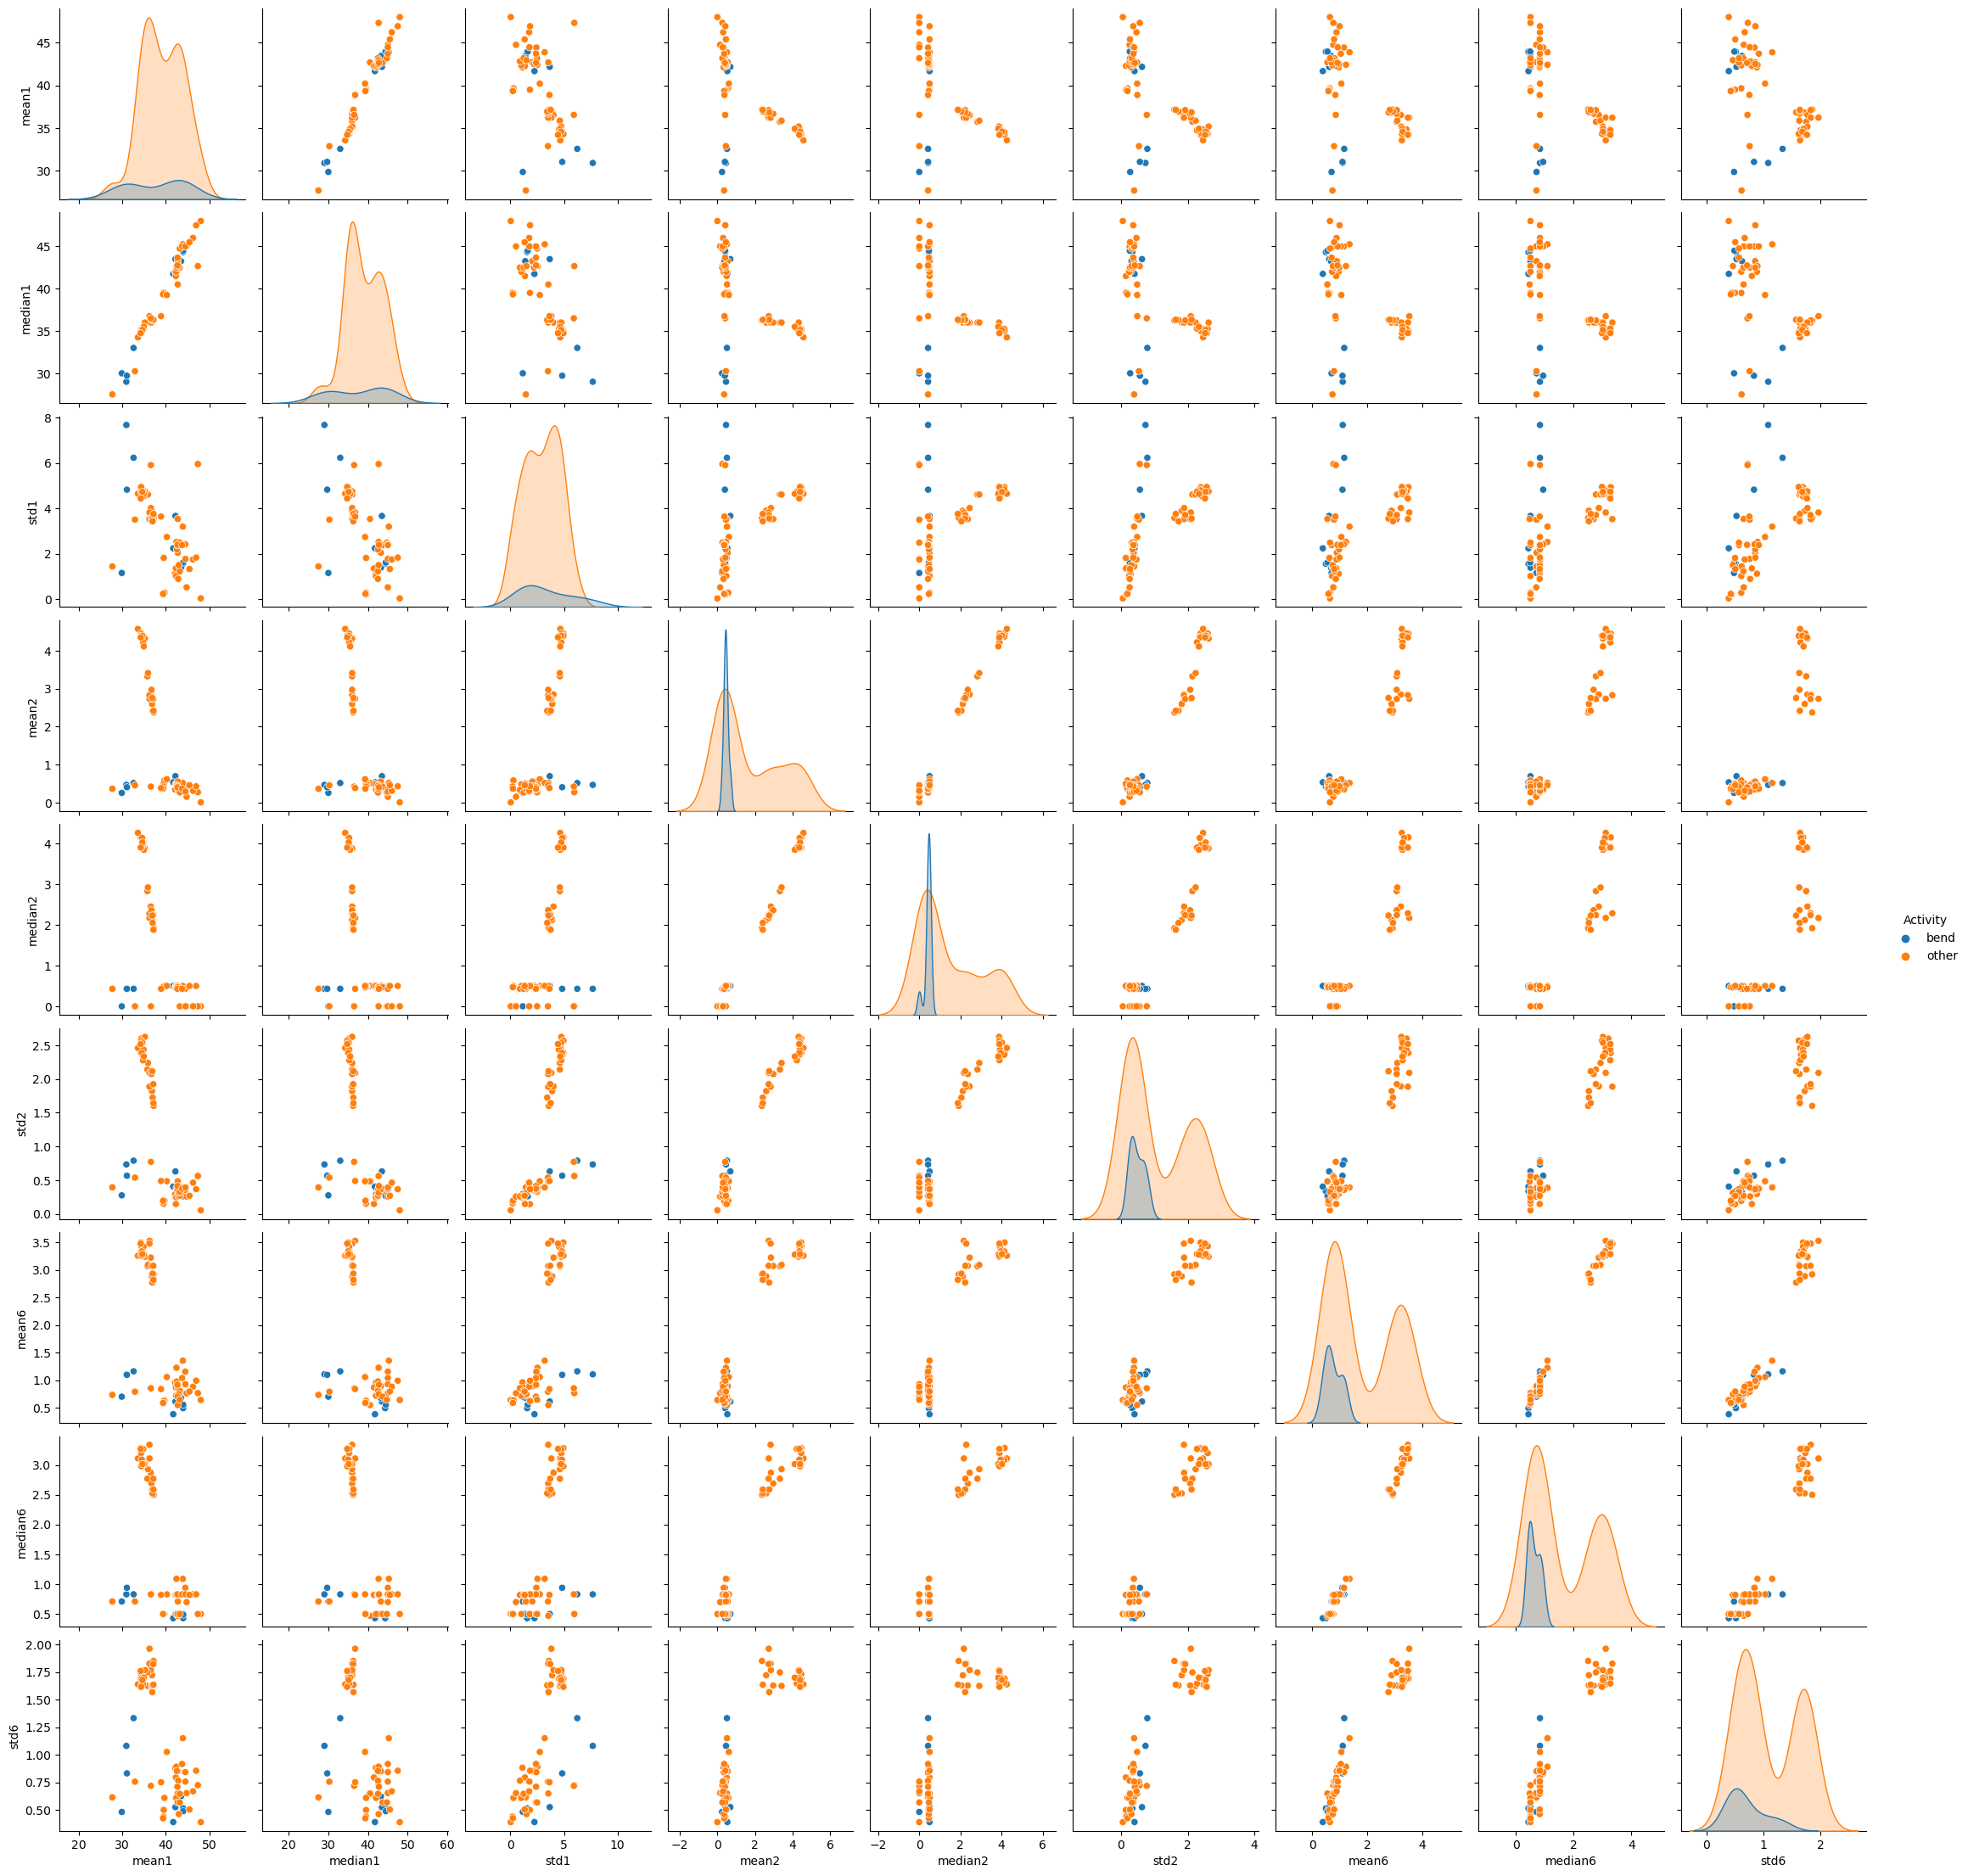

In [5]:
ia2_train = iidftrain_tdfeatures.loc[:,['mean1','median1','std1','mean2','median2','std2','mean6','median6','std6']]
ia2_train['Activity'] = 'other'
ia2_train.loc[0:8, 'Activity'] = 'bend'

sns.pairplot(ia2_train, hue='Activity')
plt.show()

#### ii. Splitted Plots

In [6]:
iia2_train = []
for i, df in enumerate(df_train):
    iia2 = df.iloc[:, 1::]
    iia2_len = len(iia2)/2
    iia2_len_int = int(iia2_len)
    iia2_topsplit = iia2.iloc[0:iia2_len_int, :]
    iia2_topsplit = iia2_topsplit.reset_index(drop=True)
    iia2_btmsplit = iia2.iloc[iia2_len_int::, :]
    iia2_btmsplit = iia2_btmsplit.reset_index(drop=True)
    iia2_split = pd.concat([iia2_topsplit, iia2_btmsplit], axis=1)
    iia2_ts126 = iia2_split.iloc[:, [0,1,5,6,7,11]]
    iia2_mean = iia2_ts126.mean()
    iia2_med = iia2_ts126.median()
    iia2_std = iia2_ts126.std()
    iia2_feature = pd.concat([iia2_mean, iia2_med, iia2_std], axis=1)
    iia2_feature1file = iia2_feature.values.ravel()
    iia2_train.append(iia2_feature1file)

iia2_train = pd.DataFrame(iia2_train)
iia2_train.columns = ['mean1', 'median1', 'std1', 'mean2', 'median2', 'std2', 'mean6', 'median6', 'std6',
                      'mean7', 'median7', 'std7', 'mean8', 'median8', 'std8', 'mean12', 'median12', 'std12']

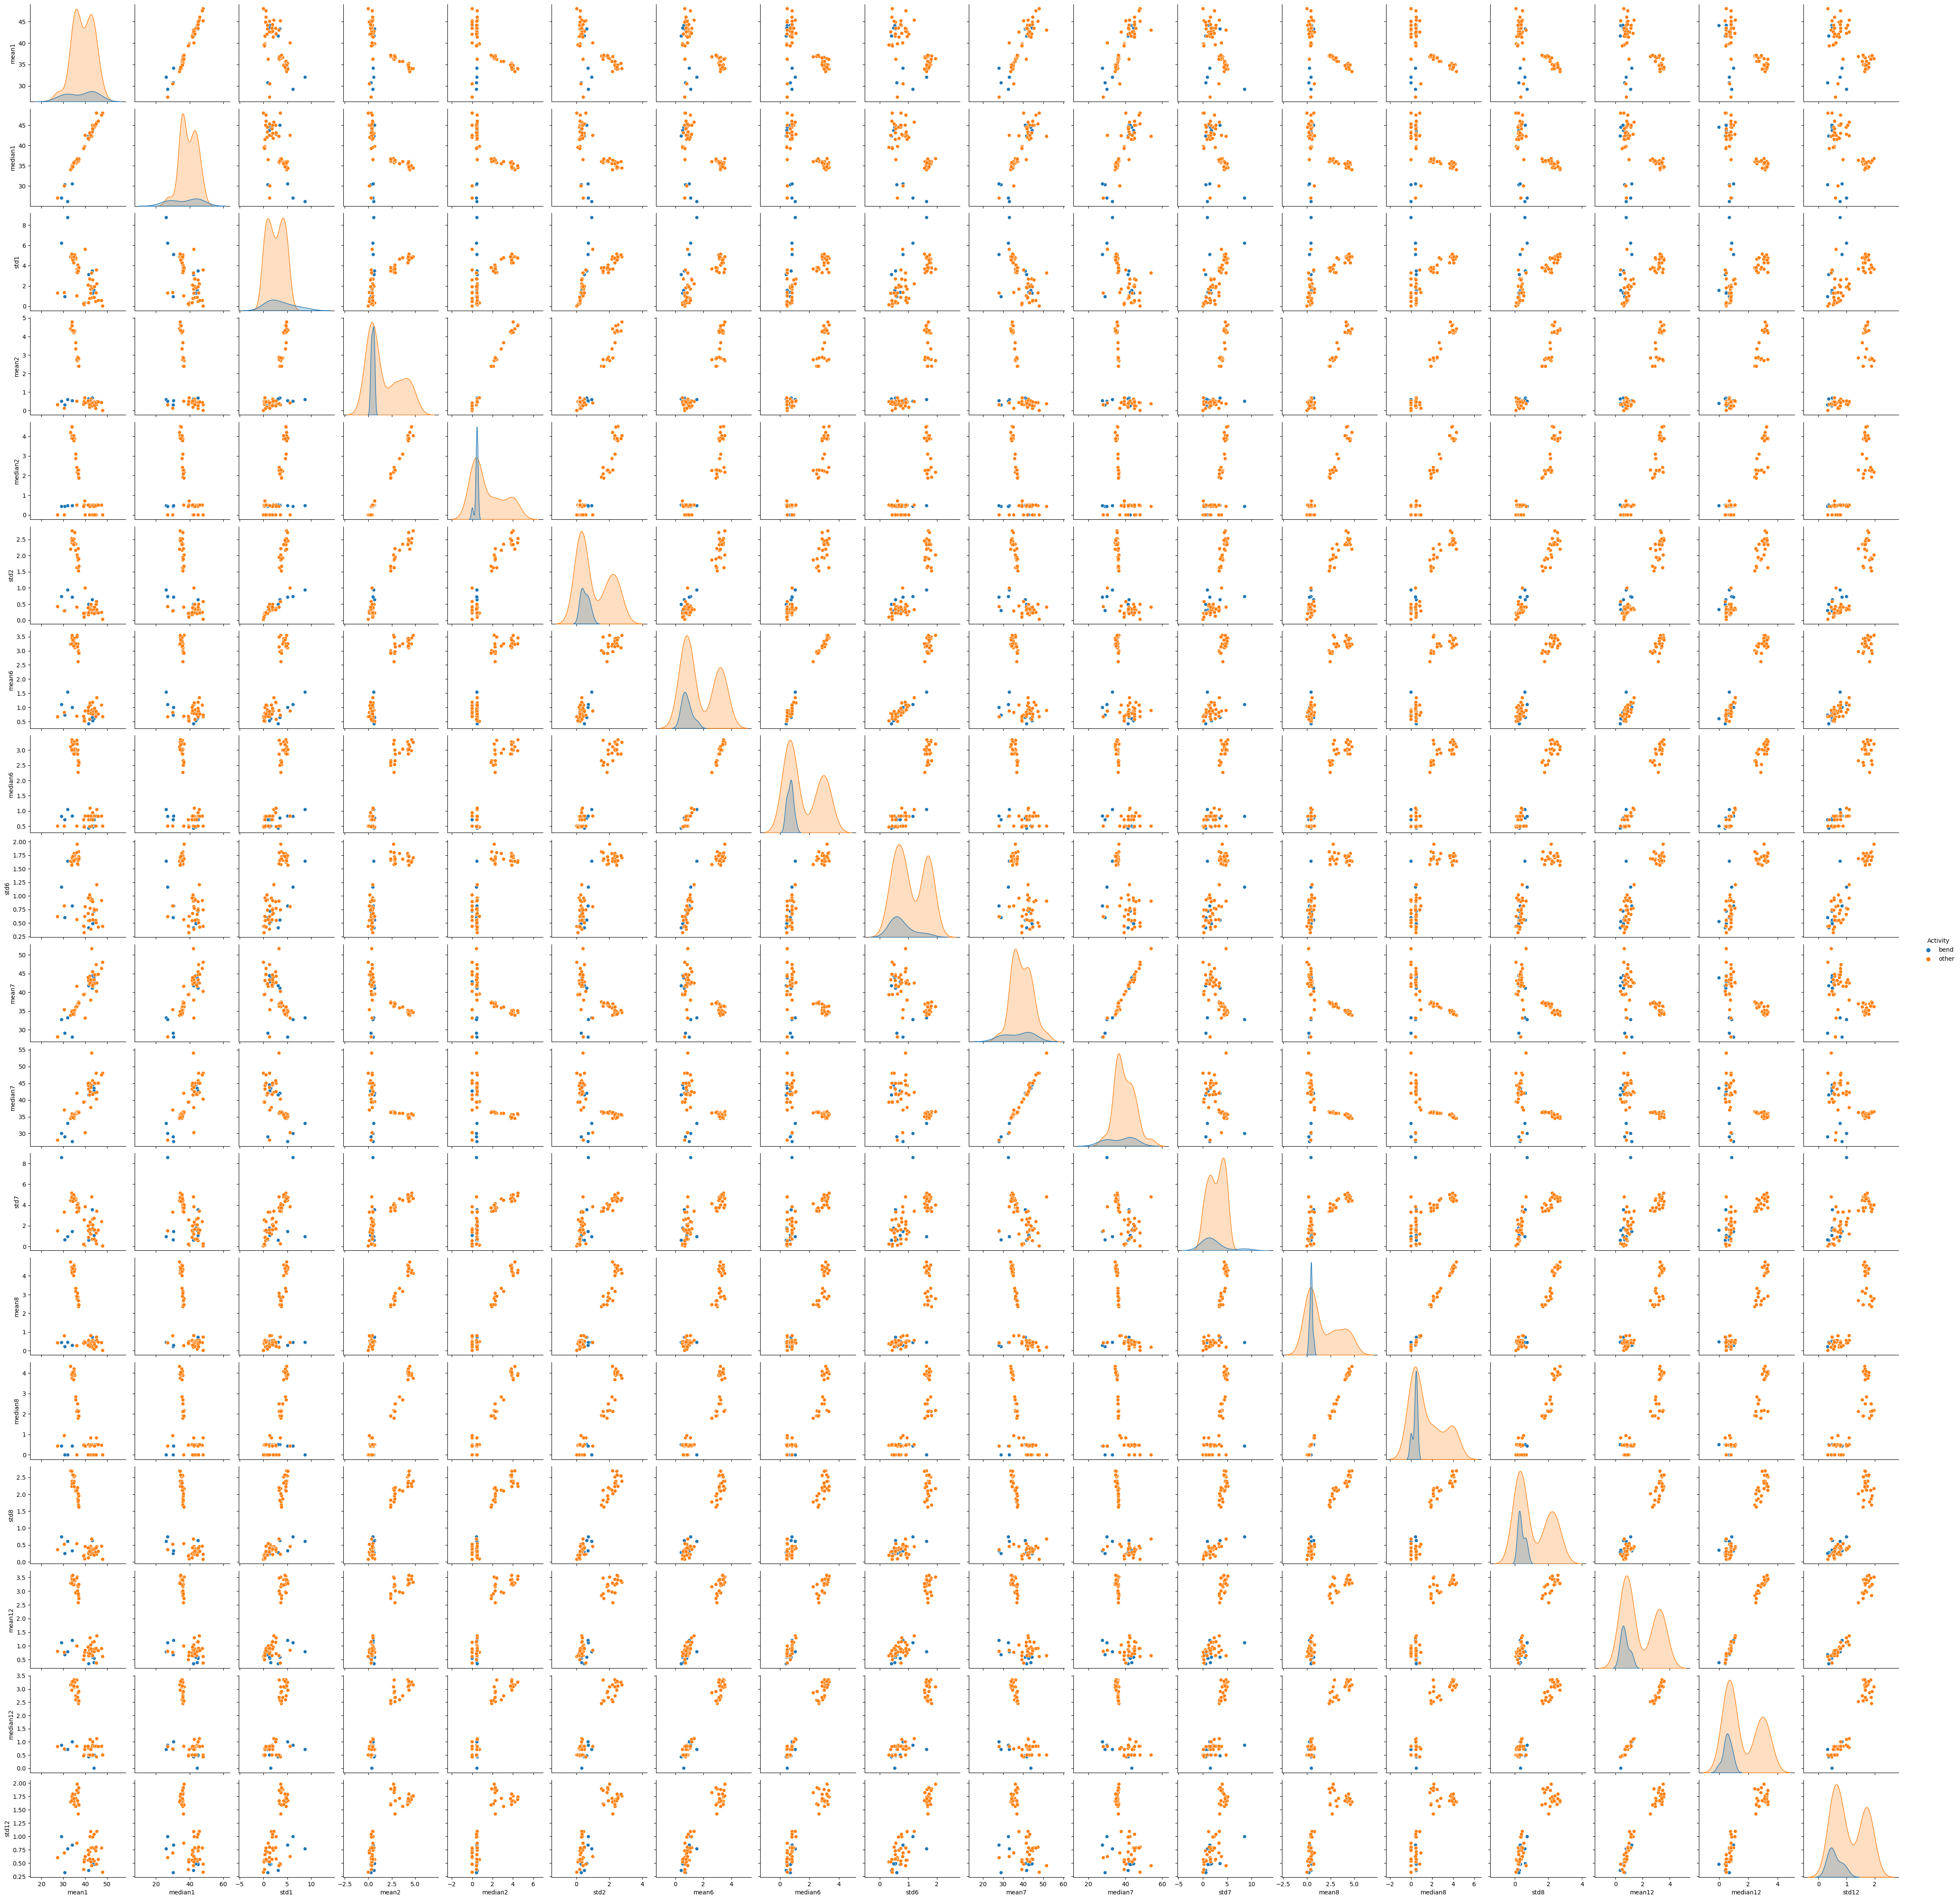

In [7]:
iia2_train['Activity'] = 'other'
iia2_train.loc[0:8, 'Activity'] = 'bend'

sns.pairplot(iia2_train, hue='Activity')
plt.show()

#### iii. Time Series Segments

In [8]:
iiia2_l = list(range(1,21))

# 1 is bend, 0 is other
iiia2_trainydata = [1] * 9 + [0] * 60
iiia2_trainy = np.array(iiia2_trainydata)

iiia2_trainx = []
for l in iiia2_l:
    iiia2_x= []
    for i, df in enumerate(df_train):
        df = df.iloc[:, 1:]
        section = np.array_split(df, l)
        for dfs in section:
            dfs.reset_index(drop=True, inplace=True)
        new_df = pd.concat(section, axis=1)
        iiia2_mean = new_df.mean()
        iiia2_med = new_df.median()
        iiia2_std = new_df.std()
        iiia2_feature = pd.concat([iiia2_mean, iiia2_med, iiia2_std], axis=1)
        iiia2_feature1file = iiia2_feature.values.ravel()
        iiia2_x.append(iiia2_feature1file)
    iiia2_x = pd.DataFrame(iiia2_x)
    iiia2_trainx.append(iiia2_x)
    
# 1 is bend, 0 is other
iiia2_testydata = [1] * 4 + [0] * 15
iiia2_testy = np.array(iiia2_testydata)

iiia2_testx = []
for l in iiia2_l:
    iiia2_x= []
    for i, df in enumerate(df_test):
        df = df.iloc[:, 1:]
        section = np.array_split(df, l)
        for dfs in section:
            dfs.reset_index(drop=True, inplace=True)
        new_df = pd.concat(section, axis=1)
        iiia2_mean = new_df.mean()
        iiia2_med = new_df.median()
        iiia2_std = new_df.std()
        iiia2_feature = pd.concat([iiia2_mean, iiia2_med, iiia2_std], axis=1)
        iiia2_feature1file = iiia2_feature.values.ravel()
        iiia2_x.append(iiia2_feature1file)
    iiia2_x = pd.DataFrame(iiia2_x)
    iiia2_testx.append(iiia2_x)

In [9]:
import statsmodels.api as sm
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    iia2_trainsummary = []
    for i, df in enumerate(iiia2_trainx):
        sm_model = sm.Logit(iiia2_trainy, df)
        result = sm_model.fit(method = 'bfgs',maxiter = 100)
        summary = result.summary()
        iia2_trainsummary.append(summary)
iia2_trainsummary

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
  

[<class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:                      y   No. Observations:                   69
 Model:                          Logit   Df Residuals:                       51
 Method:                           MLE   Df Model:                           17
 Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                   1.000
 Time:                        18:57:51   Log-Likelihood:            -2.0385e-05
 converged:                       True   LL-Null:                       -26.718
 Covariance Type:            nonrobust   LLR p-value:                 1.219e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 0             -9.8725        nan        nan        nan         nan         nan
 1              4.2695        nan        nan        nan         nan   

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
import time
now = time.time()
iia2_pair = []
iia2_trainpair = []
for i in iiia2_l:
    logreg = LogisticRegression(solver='lbfgs', max_iter=400)
    selector = RFECV(logreg, step=1, cv=5, min_features_to_select= 1)
    result = selector.fit(iiia2_trainx[i-1], iiia2_trainy)
    p = result.n_features_
    predicty = result.predict(iiia2_testx[i-1])
    trainpredicty = result.predict(iiia2_trainx[i-1])
    error = 1-accuracy_score(iiia2_testy, predicty)
    iia2_pair.append((i, p, error, predicty))
    iia2_trainpair.append((i, trainpredicty))
    print(i, p, error, time.time() - now)

1 6 0.0 1.0653536319732666
2 10 0.0 3.876661539077759
3 1 0.10526315789473684 8.812541723251343
4 1 0.21052631578947367 14.670344114303589
5 1 0.21052631578947367 22.23246431350708
6 1 0.21052631578947367 31.272581100463867
7 2 0.10526315789473684 43.814908027648926
8 1 0.052631578947368474 57.142234086990356
9 7 0.052631578947368474 71.9679217338562
10 10 0.052631578947368474 88.91411709785461
11 8 0.052631578947368474 108.11107349395752
12 1 0.052631578947368474 129.11817383766174
13 1 0.052631578947368474 153.14093708992004
14 1 0.052631578947368474 179.3706181049347
15 1 0.052631578947368474 206.80265188217163
16 7 0.052631578947368474 238.87093472480774
17 11 0.052631578947368474 354.080952167511
18 12 0.052631578947368474 393.2331404685974
19 14 0.052631578947368474 433.8648953437805
20 1 0.052631578947368474 477.7082657814026


The wrong way to perform cross validation is taking the validation data from the training dataset and this method resulted in undistinguishable features. The right way to perform the cross validation is with REFCV where the validation is already set aside so that there is training, validation, and test data.
The best (l,p) pair are the ones with lowest error and there are multiple of them, one of which is for l=1. I choose l=1 because it is the original dataset with least amount of features and this model can still be used.

#### iv. Confusion Matrix

The test data confusion matrix is 
[[15  0]
 [ 0  4]]
The train data confusion matrix is 
 [[60  0]
 [ 0  9]]


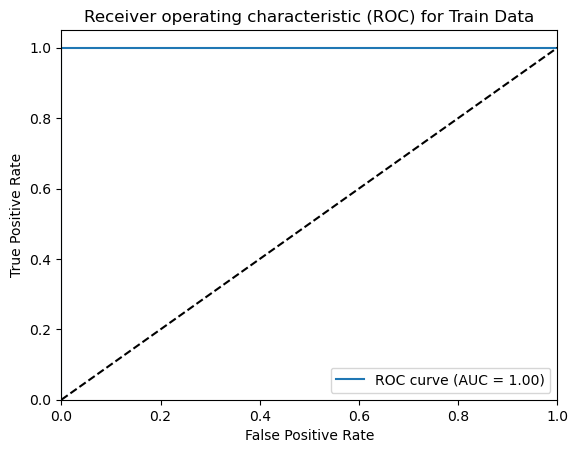

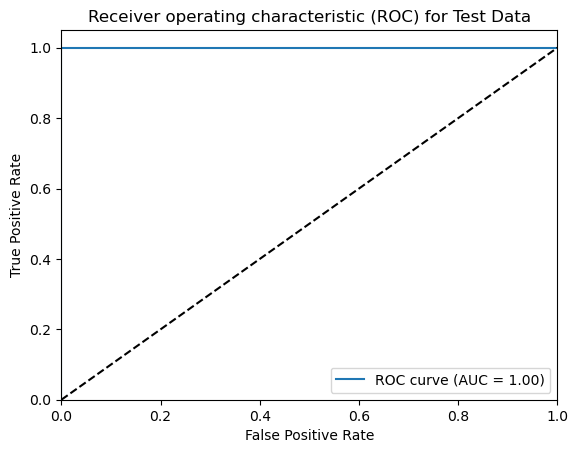



The following are the coefficients [[-0.35795039 -0.44225183 -0.35444851 -0.40121338  1.27131293  1.0087557 ]]
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 31
         Function evaluations: 34
         Gradient evaluations: 34
The p values for betas are [0.99999968 0.99999997 0.9999999  1.         0.99999967 0.99999997]


C:\Users\htet.ma\Miniconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import statsmodels.api as sm

# l=1
iv_lp = iia2_pair[0]
iv_predicty = iv_lp[3]
cm = confusion_matrix(iiia2_testy, iv_predicty)
print(f'The test data confusion matrix is \n{cm}')
iv_trainlp = iia2_trainpair[0]
iv_trainpredicty = iv_trainlp[1]
iv_traincm = confusion_matrix(iiia2_trainy, iv_trainpredicty)
print(f'The train data confusion matrix is \n {iv_traincm}')

# ROC, AUC
iv_logreg = LogisticRegression(solver='lbfgs', max_iter=400)
iv_selector = RFECV(iv_logreg, step=1, cv=5, min_features_to_select= 1)
iv_result = iv_selector.fit(iiia2_trainx[0], iiia2_trainy)
iv_p = iv_result.n_features_
iv_trainyprob = iv_result.predict_proba(iiia2_trainx[0])[:,1]
iv_testyprob = iv_result.predict_proba(iiia2_testx[0])[:,1]
fpr, tpr, thresholds = roc_curve(iiia2_trainy, iv_trainyprob)
testfpr, testtpr, testthresholds = roc_curve(iiia2_testy, iv_testyprob)
auc = roc_auc_score(iiia2_trainy, iv_trainyprob)
testauc = roc_auc_score(iiia2_testy, iv_testyprob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for Train Data')
plt.legend(loc="lower right")
plt.show()

plt.plot(testfpr, testtpr, label='ROC curve (AUC = %0.2f)' % testauc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for Test Data')
plt.legend(loc="lower right")
plt.show()

#Coefficient
iv_l1trainx = iiia2_trainx[0]
iv_select_feature = iv_selector.support_
iv_coef = iv_selector.estimator_.coef_
print(f'\n\nThe following are the coefficients {iv_coef}')

#P value
iv_feature = iv_l1trainx.loc[:, iv_select_feature].values
iv_xintercept = sm.add_constant(iv_feature)
iv_model = sm.Logit(iiia2_trainy, iv_xintercept)
iv_presult = iv_model.fit(method = 'bfgs')
iv_pvalues = iv_presult.pvalues[1:]
print(f'The p values for betas are {iv_pvalues}')

#### v. Test Classifier

In [12]:
v_l1testx = iiia2_testx[0]
v_testyprob = iv_result.predict(v_l1testx)
v_accuracy = accuracy_score(iiia2_testy, v_testyprob)
print(f'For this case, I obtained accuracy of 1 and in the previous case, part iii, the accuracy was 1.')

For this case, I obtained accuracy of 1 and in the previous case, part iii, the accuracy was 1.


#### vi. Separation

Yes, my  classes seem to be well-separated to cause instability in calculating logistic regression parameters.

#### vii. Imbalance

In [13]:
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1_score))

print(f'I do not have imbalanced classes.')

Precision: 1.00
Recall: 1.00
F1 score: 1.00
I do not have imbalanced classes.


### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [14]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

ib_pairs = []
for i in iiia2_l:
    ib_scaler = StandardScaler()
    ib_trainxstd = ib_scaler.fit_transform(iiia2_trainx[i-1])
    ib_clf = LogisticRegressionCV(Cs=10, cv=5, penalty='l1', solver='liblinear', scoring='accuracy', random_state=42)
    ib_clf.fit(ib_trainxstd, iiia2_trainy)
    ib_selected_features = [feature for feature, coef in zip(range(ib_trainxstd.shape[1]), ib_clf.coef_[0]) if coef != 0]
    ib_accuracy = ib_clf.score(iiia2_testx[i-1], iiia2_testy)
    ib_error = 1 - ib_accuracy
    ib_pairs.append((i, ib_selected_features, error))
#     print(i, ib_selected_features, error)

ib_indexminerror = pd.DataFrame(ib_pairs).iloc[:,2].idxmin()

#### ii. Comparison

The L1 penalized logistic regression performs better and is easier to implement. It has lower error than that of part a.

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

There are multiple l with the lowest error. I choose l=1.


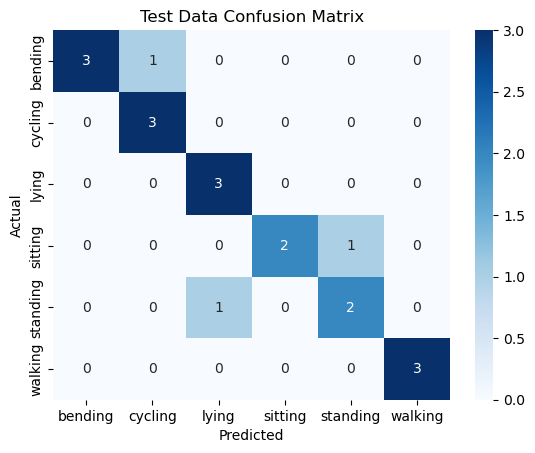

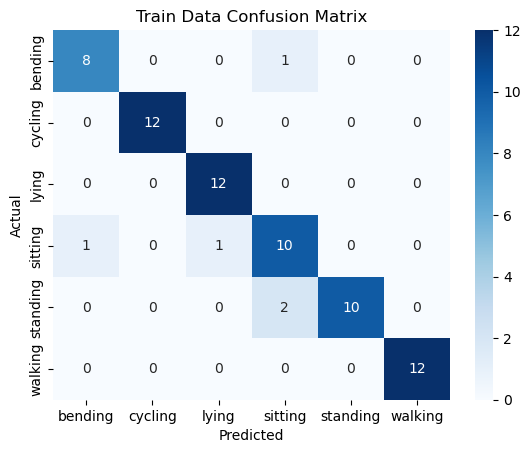

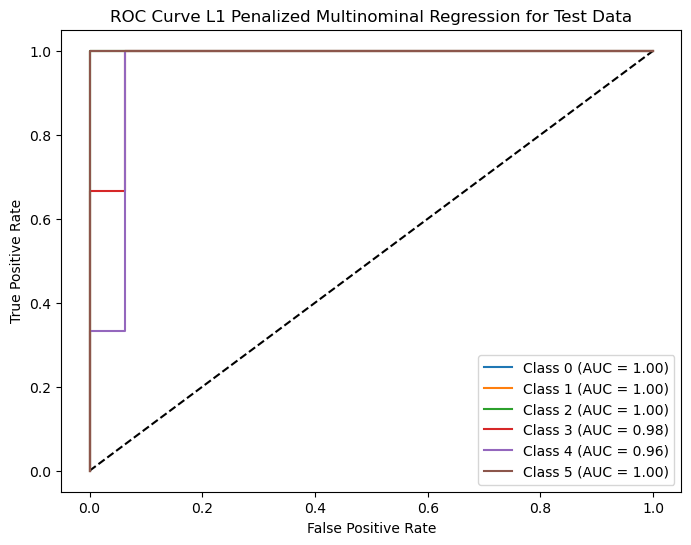

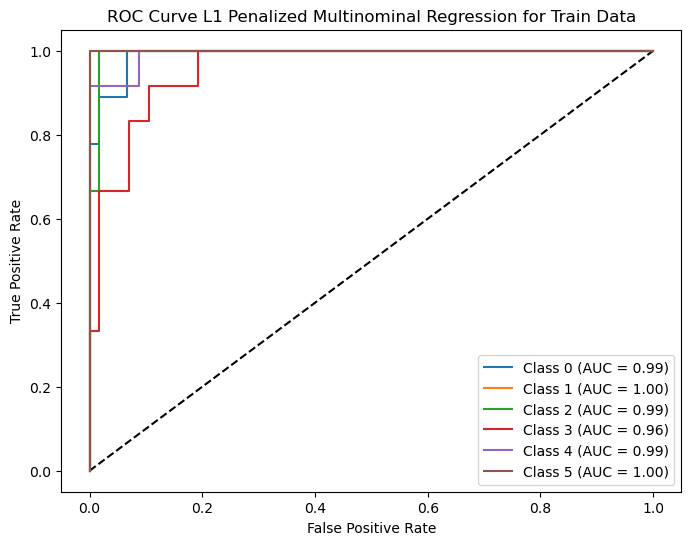

In [15]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # 0 is bend, 1 is cycle, 2 is lie, 3 is sit, 4 is stand, 5 is walk
    ic_trainy = [0] * 9 + [1] * 12 + [2] * 12 + [3] * 12 + [4] * 12 + [5] * 12
    ic_trainy = np.array(ic_trainy)
    ic_testy = [0] * 4 + [1] * 3 + [2] * 3 + [3] * 3 + [4] * 3 + [5] * 3
    ic_testy = np.array(ic_testy)
    
    action = ['bending', 'cycling', 'lying', 'sitting', 'standing', 'walking']
    
    ic_pairs = []
    ic_trainpairs = []
    
    for i in iiia2_l:
        ic_clf = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial')
        ic_model = ic_clf.fit(iiia2_trainx[i-1], ic_trainy)
        ic_predicty = ic_model.predict(iiia2_testx[i-1])
        ic_trainpredicty = ic_model.predict(iiia2_trainx[i-1])
        ic_accuracy = ic_model.score(iiia2_testx[i-1], ic_testy)
        ic_error = 1 - ic_accuracy
        ic_pairs.append((i, ic_error, ic_predicty))
        ic_trainpairs.append((i, ic_trainpredicty))
    
    print(f'There are multiple l with the lowest error. I choose l=1.')
    
    #Confusion matrix
    ic_l = ic_pairs[0]
    ic_cmpredicty = ic_l[2]
    cm = confusion_matrix(ic_testy, ic_cmpredicty)
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=action, yticklabels=action)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Test Data Confusion Matrix')
    plt.show
    
    ic_trainl = ic_trainpairs[0]
    ic_traincmpredicty = ic_trainl[1]
    ic_traincm = confusion_matrix(ic_trainy, ic_traincmpredicty)
    plt.figure()
    sns.heatmap(ic_traincm, annot=True, cmap='Blues', xticklabels=action, yticklabels=action)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Train Data Confusion Matrix')
    plt.show
    
    #ROC
    ic_roc_clf = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial')
    ic_roc_model = ic_clf.fit(iiia2_trainx[0], ic_trainy)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    trainfpr = dict()
    traintpr = dict()
    train_roc_auc = dict()
    n_classes = len(np.unique(ic_trainy))
    for i in range(n_classes):
        y_pred_proba = ic_roc_model.predict_proba(iiia2_testx[0])[:, i]
        y_train_pred_proba = ic_roc_model.predict_proba(iiia2_trainx[0])[:, i]
        y_test_binary = (ic_testy == i).astype(int)
        y_train_binary = (ic_trainy == i).astype(int)
        fpr[i], tpr[i], _ = roc_curve(y_test_binary, y_pred_proba)
        trainfpr[i], traintpr[i], train_ = roc_curve(y_train_binary, y_train_pred_proba)
        roc_auc[i] = auc(fpr[i], tpr[i])
        train_roc_auc[i] = auc(trainfpr[i], traintpr[i])

    # Plot ROC curves
    plt.figure(figsize=(8,6))
    plt.plot([0, 1], [0, 1], 'k--')
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve L1 Penalized Multinominal Regression for Test Data')
    plt.legend(loc="lower right")
    plt.show()
    
    plt.figure(figsize=(8,6))
    plt.plot([0, 1], [0, 1], 'k--')
    for i in range(n_classes):
        plt.plot(trainfpr[i], traintpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, train_roc_auc[i]))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve L1 Penalized Multinominal Regression for Train Data')
    plt.legend(loc="lower right")
    plt.show()

#### ii. Naive Bayes

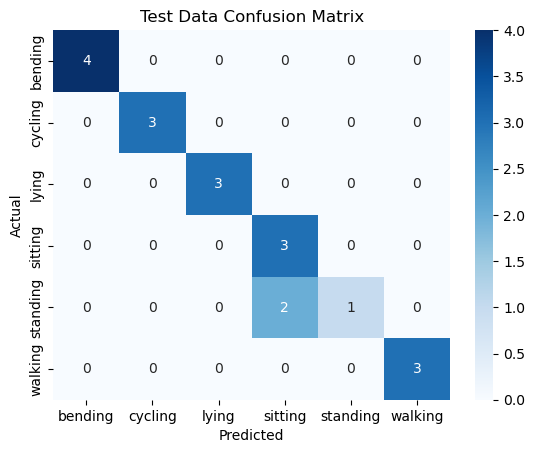

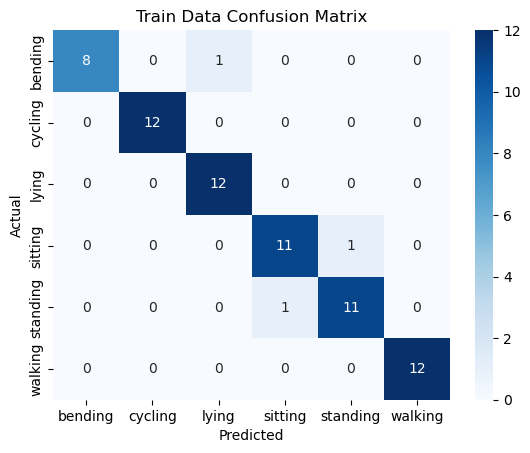

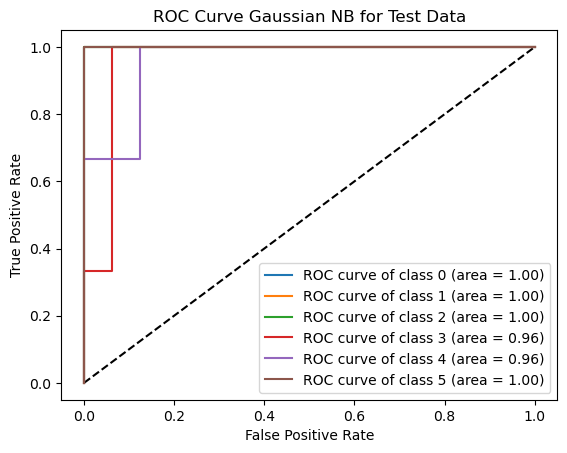

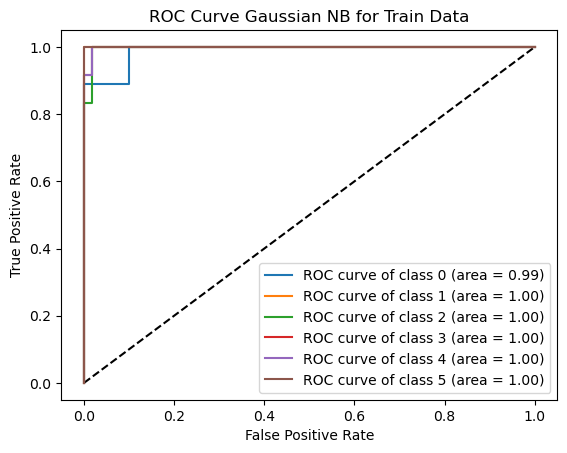

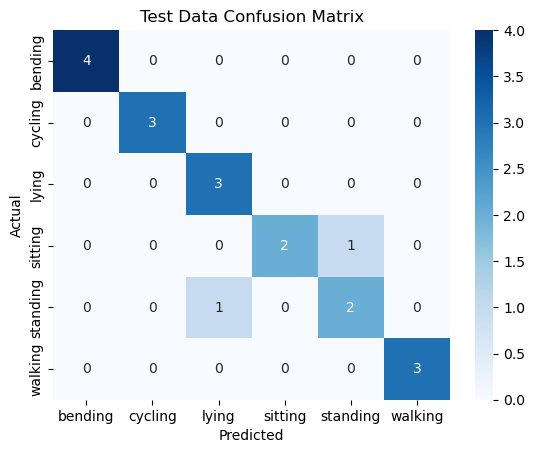

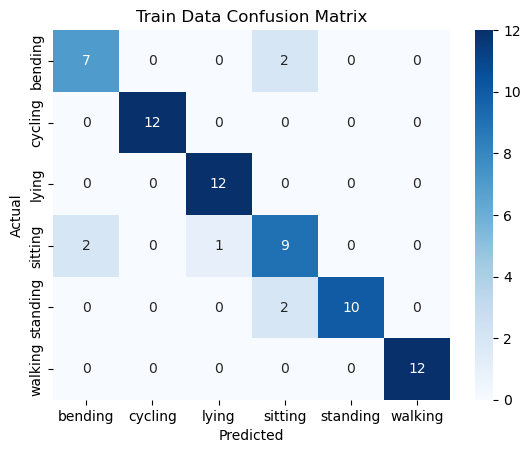

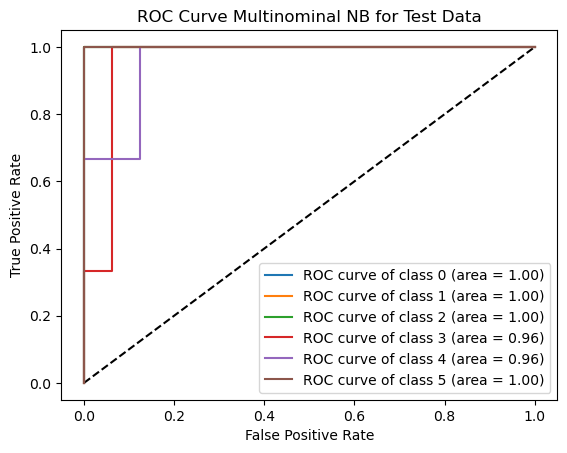

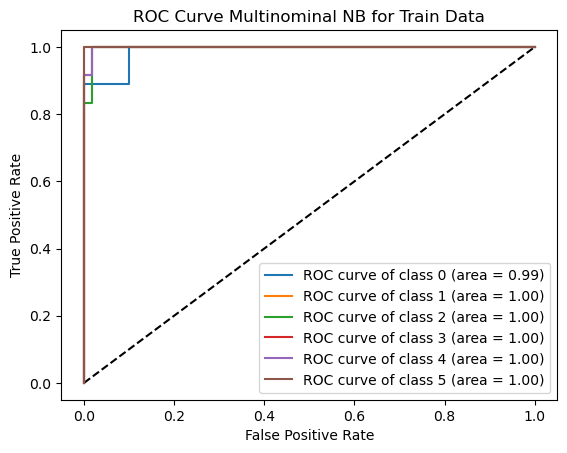

In [16]:
# Gaussian
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc
gnb_pairs = []
gnb_trainpairs = []
for i in iiia2_l:
    gnb = GaussianNB()
    gnb.fit(iiia2_trainx[i-1], ic_trainy)
    gnb_ypred = gnb.predict(iiia2_testx[i-1])
    gnb_trainypred = gnb.predict(iiia2_trainx[i-1])
    gnb_accuracy =  accuracy_score(ic_testy, gnb_ypred)
    gnb_error = 1 - gnb_accuracy
    gnb_pairs.append((i, gnb_error, gnb_ypred))
    gnb_trainpairs.append((i, gnb_trainypred))
    
gnb_l = gnb_pairs[0]
gnb_cmpredy = gnb_l[2]
gnb_cm = confusion_matrix(ic_testy, gnb_cmpredy)
sns.heatmap(gnb_cm, annot=True, cmap='Blues', xticklabels=action, yticklabels=action)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Test Data Confusion Matrix')
plt.show

gnb_trainl = gnb_trainpairs[0]
gnb_traincmpredy = gnb_trainl[1]
gnb_traincm = confusion_matrix(ic_trainy, gnb_traincmpredy)
plt.figure()
sns.heatmap(gnb_traincm, annot=True, cmap='Blues', xticklabels=action, yticklabels=action)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Train Data Confusion Matrix')
plt.show

gnb = GaussianNB()
gnb.fit(iiia2_trainx[0], ic_trainy)
gnb_probas = gnb.predict_proba(iiia2_testx[0])
gnb_trainprobas = gnb.predict_proba(iiia2_trainx[0])
n_classes = len(np.unique(ic_trainy))
gnb_fpr = dict()
gnb_tpr = dict()
gnb_roc_auc = dict()
traingnb_fpr = dict()
traingnb_tpr = dict()
traingnb_roc_auc = dict()
for i in range(n_classes):
    gnb_fpr[i], gnb_tpr[i], gnb_ = roc_curve(ic_testy, gnb_probas[:,i], pos_label=i)
    traingnb_fpr[i], traingnb_tpr[i], traingnb_ = roc_curve(ic_trainy, gnb_trainprobas[:,i], pos_label=i)
    gnb_roc_auc[i] = auc(gnb_fpr[i], gnb_tpr[i])
    traingnb_roc_auc[i] = auc(traingnb_fpr[i], traingnb_tpr[i])

plt.figure()
plt.plot([0, 1], [0, 1],'k--')
for i in range(n_classes):
    plt.plot(gnb_fpr[i], gnb_tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, gnb_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Gaussian NB for Test Data')
plt.legend(loc="lower right")
plt.show()

plt.figure()
plt.plot([0, 1], [0, 1],'k--')
for i in range(n_classes):
    plt.plot(traingnb_fpr[i], traingnb_tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, traingnb_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Gaussian NB for Train Data')
plt.legend(loc="lower right")
plt.show()

# Multinominal
from sklearn.naive_bayes import MultinomialNB
mnb_pairs = []
mnb_trainpairs = []
for i in iiia2_l:
    mnb = MultinomialNB()
    mnb.fit(iiia2_trainx[i-1], ic_trainy)
    mnb_ypred = mnb.predict(iiia2_testx[i-1])
    mnb_trainypred = mnb.predict(iiia2_trainx[i-1])
    mnb_accuracy = accuracy_score(ic_testy, mnb_ypred)
    mnb_error = 1 - mnb_accuracy
    mnb_pairs.append((i, mnb_error, mnb_ypred))
    mnb_trainpairs.append((i, mnb_trainypred))
    
mnb_l = mnb_pairs[0]
mnb_cmpredy = mnb_l[2]
mnb_cm = confusion_matrix(ic_testy,mnb_cmpredy)
plt.figure()
sns.heatmap(mnb_cm, annot=True, cmap='Blues', xticklabels=action, yticklabels=action)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Test Data Confusion Matrix')
plt.show

mnb_trainl = mnb_trainpairs[0]
mnb_traincmpredy = mnb_trainl[1]
mnb_traincm = confusion_matrix(ic_trainy,mnb_traincmpredy)
plt.figure()
sns.heatmap(mnb_traincm, annot=True, cmap='Blues', xticklabels=action, yticklabels=action)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Train Data Confusion Matrix')
plt.show

mnb = GaussianNB()
mnb.fit(iiia2_trainx[0], ic_trainy)
mnb_probas = mnb.predict_proba(iiia2_testx[0])
mnb_trainprobas = mnb.predict_proba(iiia2_trainx[0])
n_classes = len(np.unique(ic_trainy))
mnb_fpr = dict()
mnb_tpr = dict()
mnb_roc_auc = dict()
trainmnb_fpr = dict()
trainmnb_tpr = dict()
trainmnb_roc_auc = dict()
for i in range(n_classes):
    mnb_fpr[i], mnb_tpr[i], mnb_ = roc_curve(ic_testy, mnb_probas[:,i], pos_label=i)
    trainmnb_fpr[i], trainmnb_tpr[i], trainmnb_ = roc_curve(ic_trainy, mnb_trainprobas[:,i], pos_label=i)
    mnb_roc_auc[i] = auc(mnb_fpr[i], mnb_tpr[i])
    trainmnb_roc_auc[i] = auc(trainmnb_fpr[i], trainmnb_tpr[i])

plt.figure()
plt.plot([0, 1], [0, 1],'k--')
for i in range(n_classes):
    plt.plot(mnb_fpr[i], mnb_tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, mnb_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Multinominal NB for Test Data')
plt.legend(loc="lower right")
plt.show()

plt.figure()
plt.plot([0, 1], [0, 1],'k--')
for i in range(n_classes):
    plt.plot(trainmnb_fpr[i], trainmnb_tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, trainmnb_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Multinominal NB for Train Data')
plt.legend(loc="lower right")
plt.show()

#### ii. Comparison

The multinominal naive bayes method is better for multi class classification because it is able to provide the lowest error when comparing between the three methods.

## 3. ISLR 4.8.3

$$p_k(x) = \frac{\pi_k\frac{1}{\sigma_k\sqrt{2\pi_k}}e^{-\frac{(x-\mu_k)^2}{2\sigma_k^2}}}{\sum_{l=1}^{K}\pi_l\frac{1}{\sigma_l\sqrt{2\pi_l}}e^{-\frac{(x-\mu_l)^2}{2\sigma_l^2}}}$$

$$argmax\,p_k(x) = argmax\,{\pi_k\frac{1}{\sigma_k\sqrt{\pi_k}}e^{-\frac{(x-\mu_k)^2}{\sigma_k^2}}}$$
We take the maximum of the $p_k(x)$ so we want to maximum the numerator because the denominator would be the same.

$$= \log \pi_k\frac{1}{\sigma_k\sqrt{\pi_k}} + \log e^{-\frac{(x-\mu_k)^2}{\sigma_k^2}}$$

$$= -\frac{(x-\mu_k)^2}{\sigma_k^2} \log \pi_k\frac{1}{\sigma_k\sqrt{\pi_k}}$$

$$= \frac{-x^2 + x\mu_k -\mu_k^2}{\sigma_k^2} \log \pi_k\frac{1}{\sigma_k\sqrt{\pi_k}}$$
The x is squared so the Bayes classifer is quadratic.

## 4. ISLR 4.8.7

$$p_k(x) = \frac{\pi_k\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu_k)^2}{2\sigma_k^2}}}{\sum_{l=1}^{K}\pi_l\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu_l)^2}{2\sigma^2}}}$$

$\pi_k$ = 0.8 and $\pi_l$ = 0.2 <br>
$\mu_k$ = 10 and $\mu_l$ = 0 <br>
$\sigma$ = 6 <br>
x = 4 <br>

In [17]:
import math
top = (0.8)*(1/(6*math.sqrt(2*0.8)))*math.exp(-((4-10)^2)/(2*(36)))
bottom = ((0.2)*(1/(6*math.sqrt(2*0.2)))*math.exp(-((4-0)^2)/(2*(36))))+(0.8)*(1/(6*math.sqrt(2*0.8)))*math.exp(-((4-10)^2)/(2*(36)))
pxk = top / bottom
print(f'Given x=4, the probability is {pxk}')

Given x=4, the probability is 0.7083929185899929


## 5.1. Extra Practice ISLR 4.8.4

## 5.2. Extra Practice ISLR 4.8.9